# Climate Disaster Costs Playbook

<p>
Mal Minhas, v0.1<br>
13.11.24
</p>
<p>
<h4>Versions</h4>
<ul>
<li><b>v0.1</b>: 13.11.24. First version</li>
</ul>
</p>

### 1. Introduction

From Reuven Lerner's blog post [here](https://www.bambooweekly.com/bw-92-climate-disaster-costs):
> COP 29 (https://unfccc.int/cop29/about-cop29), the annual UN conference on climate change, earlier on Monday of this week in Baku, Azerbaijan. Representatives from countries around the world have all come together to discuss progress toward reducing the rate of climate change, which is wreaking havoc all over the world.
> 
> Not coincidentally, the International Chamber of Commerce, representing businesses from all over the world, released a report on November 7th called, "The economist cost of extreme weather events." Their report, downloadable from https://iccwbo.org/news-publications/policies-reports/new-report-extreme-weather-events-cost-economy-2-trillion-over-the-last-decade/, shows that climate change isn't just a scientific or political issue, but a business one as well, one which is costing companies (and individuals and governments) quite a bit.
>
> This report was based, at least in part, on information at EM-DAT (https://www.emdat.be/), which dubs itself "The international disaster database"). To get their data, you'll need to register (for free) for the site, and then get it from https://public.emdat.be/data, choosing both classifications (ecological and technological) and all regions of the world, and from all years 2000 - 2024.
>
> The data dictionary for this information is at https://doc.emdat.be/docs/data-structure-and-content/emdat-public-table/ .

### 2. Analysing the data

In [1]:
%%time
import pandas as pd

data = "public_emdat_custom_request_2024-11-13_72140c6b-ec8a-4332-85c2-43b5691660a8.xlsx"
df = pd.read_excel(data)

CPU times: user 6.28 s, sys: 123 ms, total: 6.4 s
Wall time: 5.18 s


Let's have a look at the columns in here:

In [2]:
print(list(df.columns))

['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update']


In [3]:
print(list(df.dtypes))

[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O')]


First question:
> Download the data. Set the index to use region, subregion, and country.
How much in total economic damage, in adjusted dollars, did we see for climatalogical disasters (see "Disaster Subgroup") in the last decade (see "Start Year")?

In [4]:
# Step 1: Set the index to Region, Subregion, and Country
df.set_index(['Region', 'Subregion', 'Country'], inplace=True)

Now we are done with `df` let's create `climatological_df` filter which contains just the last decade of data and those rows that have a `Climatological` label in `Disaster Subgroup`:

In [5]:
# Step 2: Filter for climatological disasters and records from the last decade
def getClimatologicalDisasters(nyears):
    current_year = pd.Timestamp.now().year
    start = current_year - nyears
    climatological_df = df[
        (df['Disaster Subgroup'] == 'Climatological') &
        (df['Start Year'] >= start)
    ]
    
    # Replace NaN values with 0 only in the specified columns
    columns_to_fill = [
        'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
        'Reconstruction Costs (\'000 US$)', 'Reconstruction Costs, Adjusted (\'000 US$)',
        'Insured Damage (\'000 US$)', 'Insured Damage, Adjusted (\'000 US$)', 
        'Total Damage (\'000 US$)', 'Total Damage, Adjusted (\'000 US$)', 'CPI'
    ]
    climatological_df.loc[:, columns_to_fill] = climatological_df.loc[:, columns_to_fill].fillna(0)
    return climatological_df

nyears = 10
cdf = getClimatologicalDisasters(nyears)

# Step 3: Calculate the total economic damage in adjusted dollars
total_damage = cdf['Total Damage, Adjusted (\'000 US$)'].sum()

# Output the total damage in billions
print(f"Total Adjusted damage for climate related disasters in the last {nyears} years = ${round(total_damage/10e6,2)} billion")

Total Adjusted damage for climate related disasters in the last 10 years = $24.87 billion


In [6]:
cdf.head(5)

DisNo.  \
Region   Subregion                       Country                                   
Oceania  Australia and New Zealand       Australia                 2014-0004-AUS   
                                         Australia                 2014-0062-AUS   
Americas Latin America and the Caribbean Chile                     2014-0118-CHL   
         Northern America                United States of America  2014-0165-USA   
                                         United States of America  2014-9023-USA   

                                                                  Historic  \
Region   Subregion                       Country                             
Oceania  Australia and New Zealand       Australia                      No   
                                         Australia                      No   
Americas Latin America and the Caribbean Chile                          No   
         Northern America                United States of America       No   
                                         United States of America       No   

                                                                  Classification Key  \
Region   Subregion                       Country                                       
Oceania  Australia and New Zealand       Australia                   nat-cli-wil-lan   
                                         Australia                   nat-cli-wil-lan   
Americas Latin America and the Caribbean Chile                       nat-cli-wil-lan   
         Northern America                United States of America    nat-cli-wil-for   
                                         United States of America    nat-cli-dro-dro   

                                                                  Disaster Group  \
Region   Subregion                       Country                                   
Oceania  Australia and New Zealand       Australia                       Natural   
                                         Australia                       Natural   
Americas Latin America and the Caribbean Chile                           Natural   
         Northern America                United States of America        Natural   
                                         United States of America        Natural   

                                                                  Disaster Subgroup  \
Region   Subregion                       Country                                      
Oceania  Australia and New Zealand       Australia                   Climatological   
                                         Australia                   Climatological   
Americas Latin America and the Caribbean Chile                       Climatological   
         Northern America                United States of America    Climatological   
                                         United States of America    Climatological   

                                                                  Disaster Type  \
Region   Subregion                       Country                                  
Oceania  Australia and New Zealand       Australia                     Wildfire   
                                         Australia                     Wildfire   
Americas Latin America and the Caribbean Chile                         Wildfire   
         Northern America                United States of America      Wildfire   
                                         United States of America       Drought   

                                                                                   Disaster Subtype  \
Region   Subregion                       Country                                                      
Oceania  Australia and New Zealand       Australia                 Land fire (Brush, Bush, Pasture)   
                                         Australia                 Land fire (Brush, Bush, Pasture)   
Americas Latin America and the Caribbean Chile                     Land fire (Brush, Bush, Pasture)   
         Northern America

Let's do a stacked bar plot of the different `Disaster Type` values by year with size reflecting their impact:

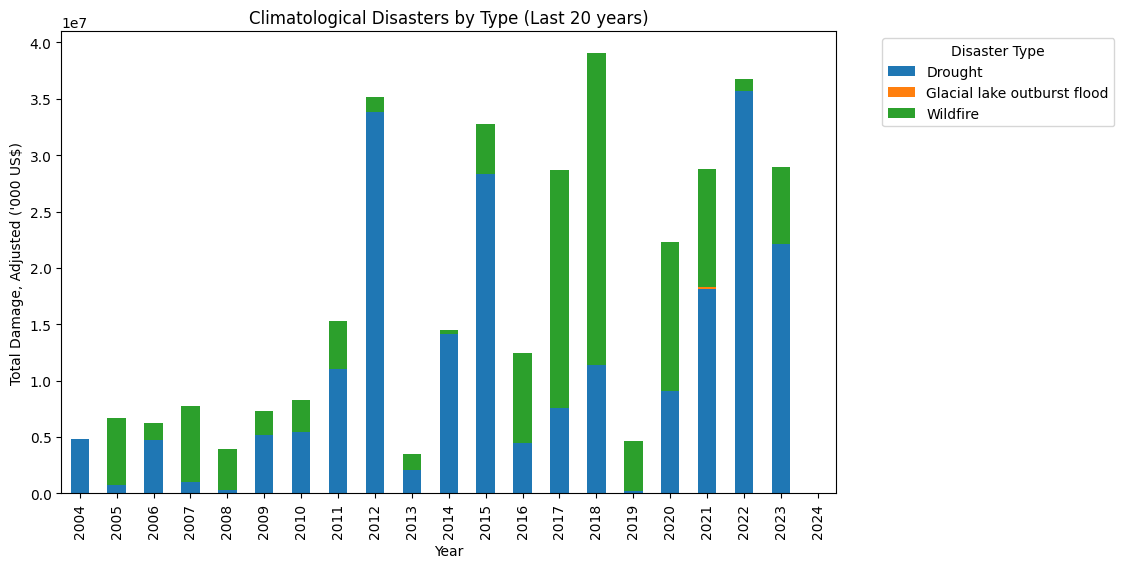

In [7]:
import matplotlib.pyplot as plt

def plot_climatological_disaster_types(df, nyears):
    # Step 1: Filter for climatological disasters within years timebox
    cdf = getClimatologicalDisasters(nyears)

    # Step 2: Group by 'Start Year' and 'Disaster Type', summing up total damage
    grouped_data = cdf.groupby(['Start Year', 'Disaster Type'])['Total Damage, Adjusted (\'000 US$)'].sum().unstack(fill_value=0)
    
    # Step 3: Plot the stacked bar chart
    ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_title(f'Climatological Disasters by Type (Last {nyears} years)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Damage, Adjusted (\'000 US$)')
    ax.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
plot_climatological_disaster_types(df, 20)

Now let's draw it with a trend line now as well.  We will need to install `sklearn` as follows in order to get linear regression support:
> pip install scikit-learn

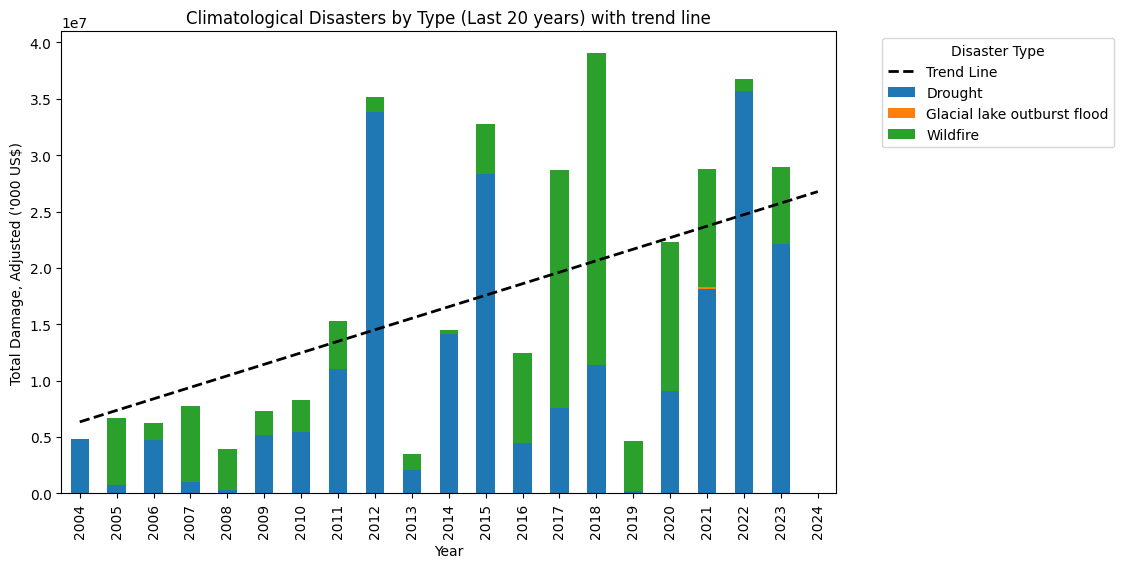

In [8]:
from sklearn.linear_model import LinearRegression

def plot_climatological_disaster_types_with_trend(df, nyears):
    # Step 1: Filter for climatological disasters within the specified number of years
    cdf = getClimatologicalDisasters(nyears)
    
    # Step 2: Group by 'Start Year' and 'Disaster Type', summing up total damage
    grouped_data = cdf.groupby(['Start Year', 'Disaster Type'])['Total Damage, Adjusted (\'000 US$)'].sum().unstack(fill_value=0)
    
    # Calculate total damage per year directly from grouped_data to maintain index alignment
    yearly_totals = grouped_data.sum(axis=1)  # This will have 'Start Year' as the index
    
    # Convert the index to numeric for regression, and fit the model
    years = yearly_totals.index.values.reshape(-1, 1)
    total_damage = yearly_totals.values

    # Step 3: Perform linear regression to find the trend line
    model = LinearRegression()
    model.fit(years, total_damage)
    trend_line = model.predict(years)
    
    # Create a DataFrame from the trend line data for exact plotting
    trendline_df = pd.DataFrame({
        'Year': yearly_totals.index,
        'Trendline Damage': trend_line
    })
    
    # Convert 'Year' to string to ensure consistent x-axis representation
    # Doesn't show trend line if you comment this out
    trendline_df['Year'] = trendline_df['Year'].astype(str)
    grouped_data.index = grouped_data.index.astype(str)
    
    # Step 4: Plot the stacked bar chart
    ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_title(f'Climatological Disasters by Type (Last {nyears} years) with trend line')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Damage, Adjusted (\'000 US$)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Overlay the trend line on the existing ax with exact values from trendline_df
    ax.plot(trendline_df['Year'], trendline_df['Trendline Damage'], color='black', linestyle='--', linewidth=2, label='Trend Line')
    ax.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plot_climatological_disaster_types_with_trend(df, 20)